In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/audio_features.csv')

print(f"Sample: {len(df)}")
print("Label distribution:")
print(df['LABEL'].value_counts())

df['label_encoded'] = LabelEncoder().fit_transform(df['LABEL'])

print("\nNull count:")
print(df.isnull().sum())

df.head(5)

Sample: 22620
Label distribution:
LABEL
REAL    11310
FAKE    11310
Name: count, dtype: int64

Null count:
chroma_stft           0
rms                   0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
LABEL                 0
label_encoded         0
dtype: int64


,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL,label_encoded
0,0.535327,0.067488,1764.451262,1796.691284,3584.884129,0.106983,-311.14330,85.054990,5.232265,13.421346,...,-11.318519,-12.272401,-5.898948,0.393349,-5.285030,-7.739865,-10.895814,-8.964587,REAL,1
1,0.313597,0.133628,1918.666171,1693.215391,3636.479592,0.146773,-257.06610,63.846890,-11.492113,12.415020,...,-5.993535,-8.152787,-6.511235,-6.769986,-10.121219,-10.561695,-13.113465,-6.858112,REAL,1
2,0.392890,0.066573,1554.670168,1819.114148,3656.101190,0.075698,-368.87738,68.654580,12.336289,28.190617,...,-2.411208,-2.020810,-2.401845,-3.019192,-7.280465,-10.187416,-6.262304,-7.050243,REAL,1
3,0.452992,0.081044,2025.520781,1762.201883,3854.965965,0.153867,-315.12207,75.764760,3.891856,16.105540,...,0.817943,-0.627142,2.011616,-7.189061,-4.106602,-11.076669,-5.687887,-6.922934,REAL,1
4,0.433777,0.059462,1902.281915,1871.366594,3993.636593,0.126240,-343.97960,60.659058,13.415092,18.371569,...,-2.824806,0.104096,2.019723,-6.339054,2.235716,-2.800121,-4.659591,-6.301791,REAL,1


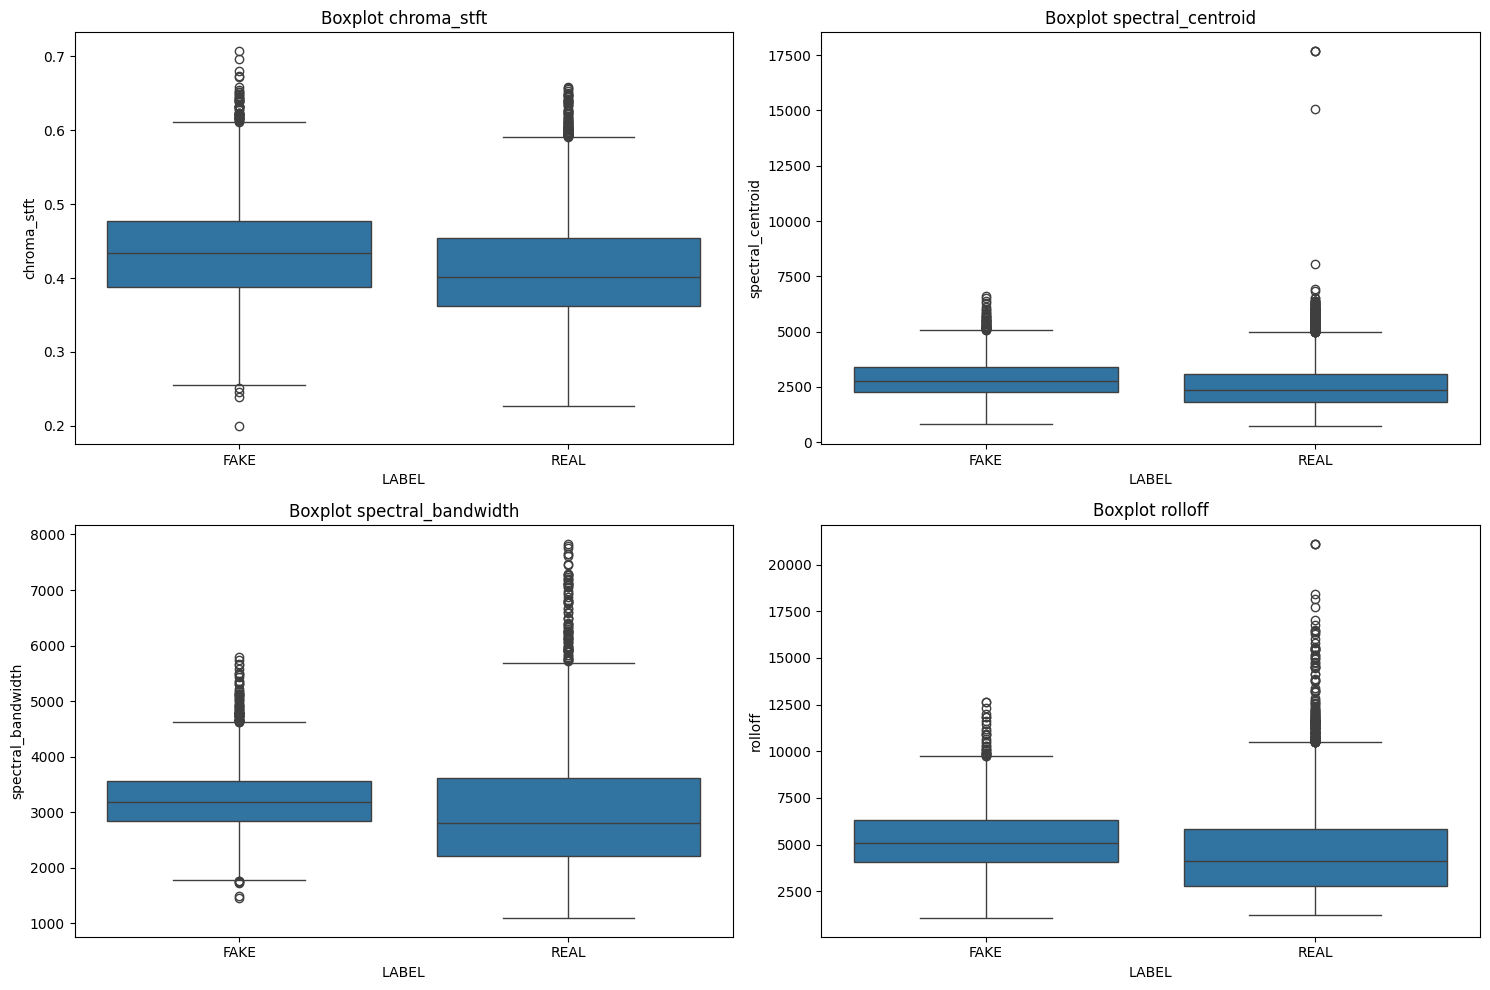

In [2]:
spectral_features = ['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'rolloff']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(spectral_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='LABEL', y=feature, data=df)
    plt.title(f'Boxplot {feature}')
plt.tight_layout()
plt.show()

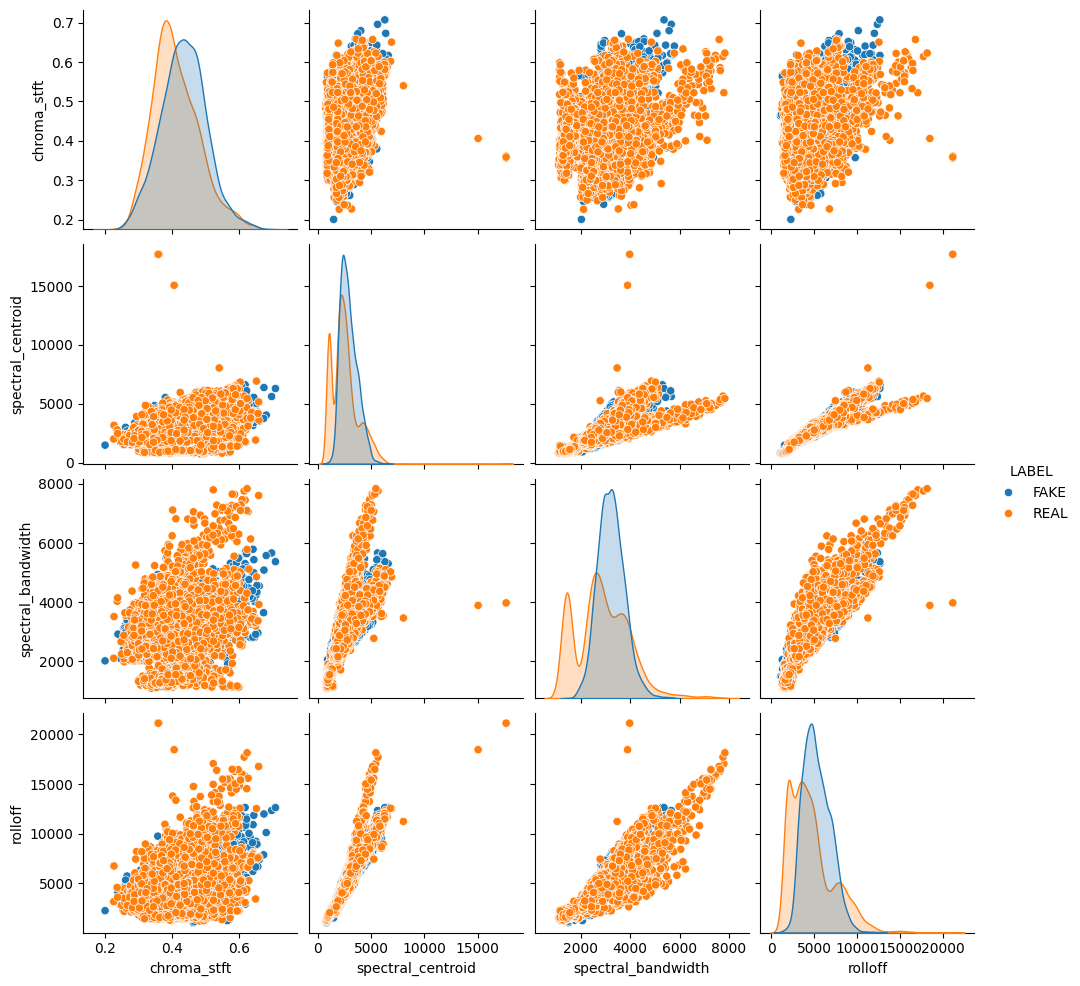

In [3]:
sns.pairplot(df[spectral_features + ['LABEL']], hue='LABEL', diag_kind='kde')
plt.show()

<Figure size 1500x600 with 0 Axes>

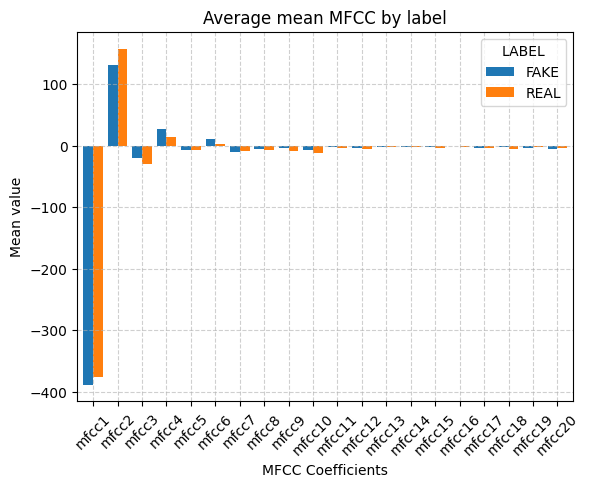

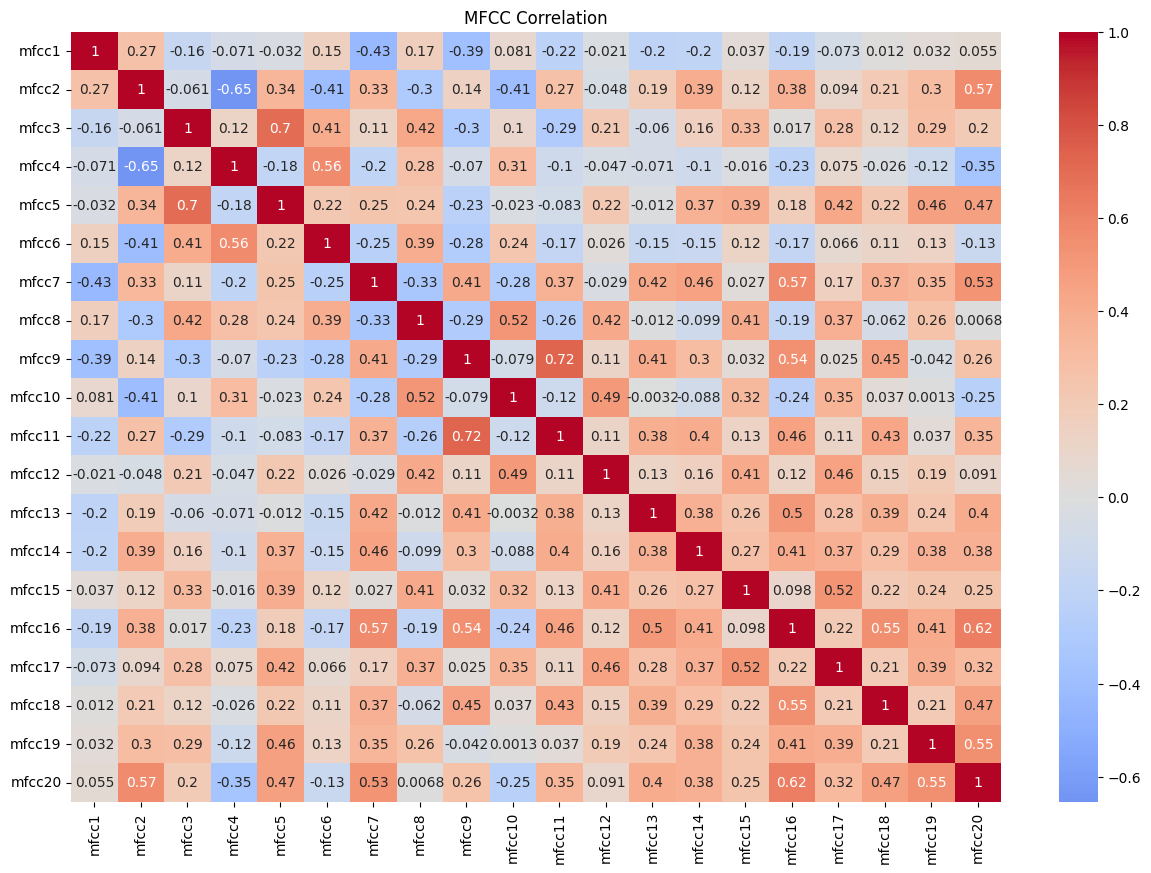

In [4]:
mfcc_features = [f'mfcc{i}' for i in range(1, 21)]

mfcc_means = df.groupby('LABEL')[mfcc_features].mean().T

plt.figure(figsize=(15, 6))
mfcc_means.plot(kind='bar', width=0.8)
plt.title('Average mean MFCC by label')
plt.ylabel('Mean value')
plt.xlabel('MFCC Coefficients')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(df[mfcc_features].corr(), cmap='coolwarm', center=0, annot=True)
plt.title('MFCC Correlation')
plt.show()

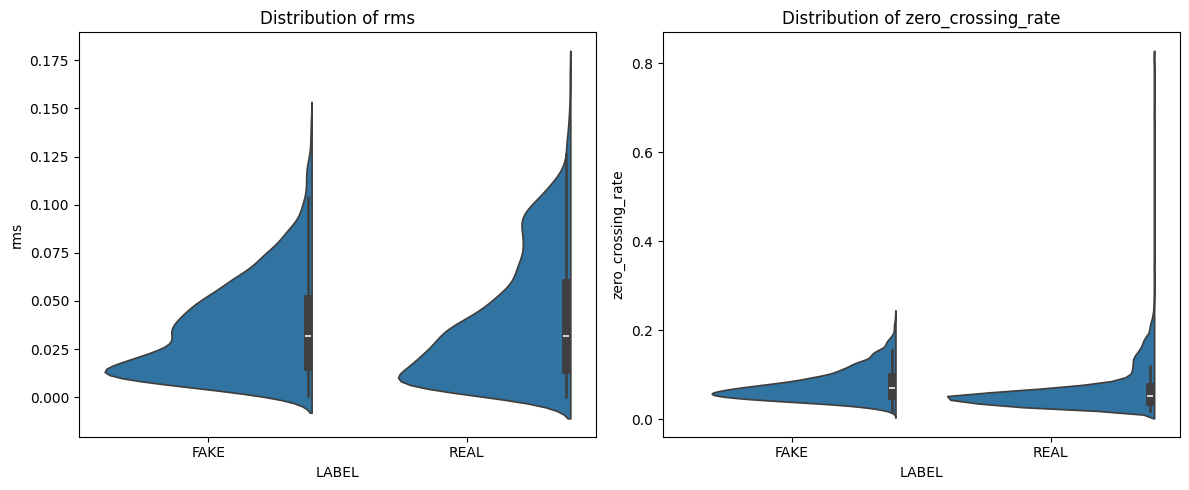

In [5]:
temporal_features = ['rms', 'zero_crossing_rate']

plt.figure(figsize=(12, 5))
for i, feature in enumerate(temporal_features, 1):
    plt.subplot(1, 2, i)
    sns.violinplot(x='LABEL', y=feature, data=df, split=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

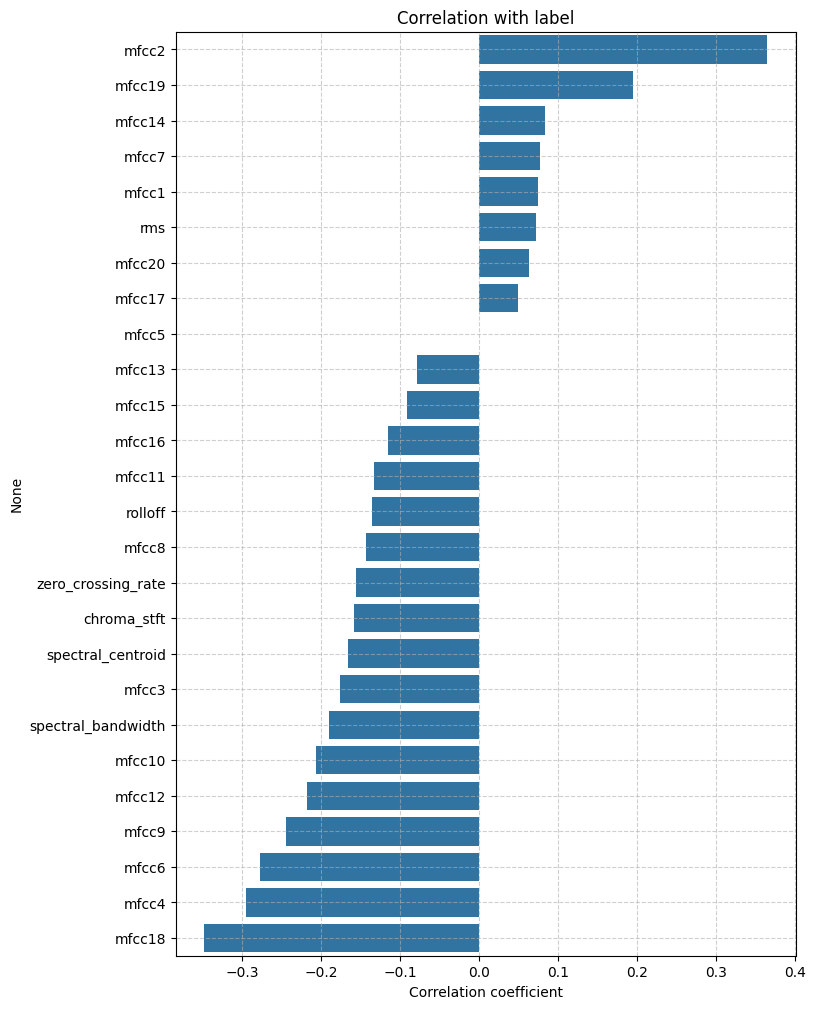

In [6]:
corr_with_label = df.drop('LABEL', axis=1).corr()['label_encoded'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(y=corr_with_label.index[1:], x=corr_with_label.values[1:], orient='h')
plt.title('Correlation with label')
plt.xlabel('Correlation coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

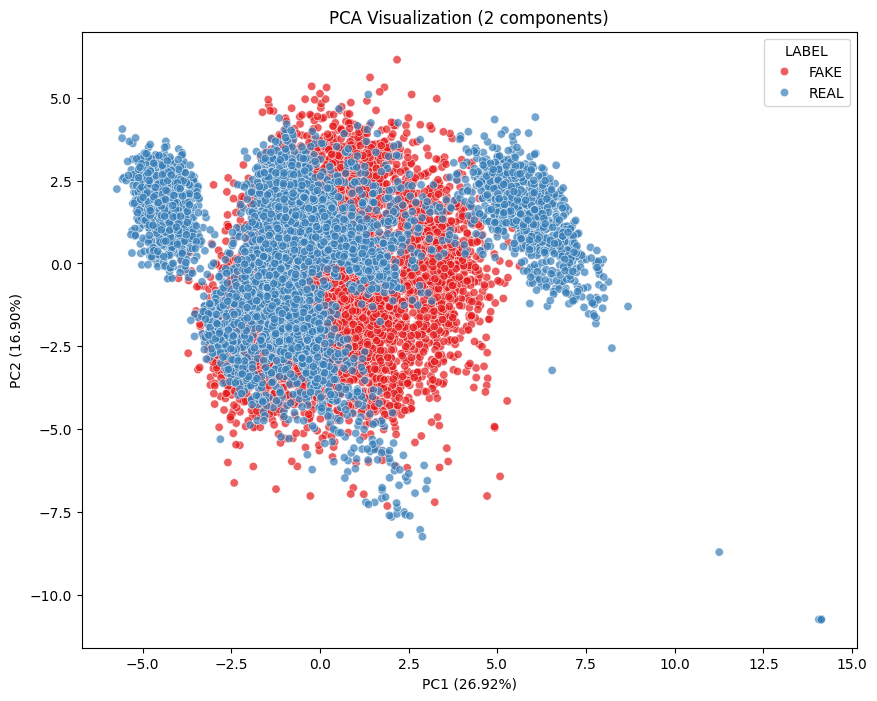

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
features = df.drop(['LABEL', 'label_encoded'], axis=1)
X_scaled = StandardScaler().fit_transform(features)

# Thực hiện PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Visualize
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['LABEL'] = df['LABEL']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='LABEL', alpha=0.7, palette='Set1')
plt.title('PCA Visualization (2 components)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.show()

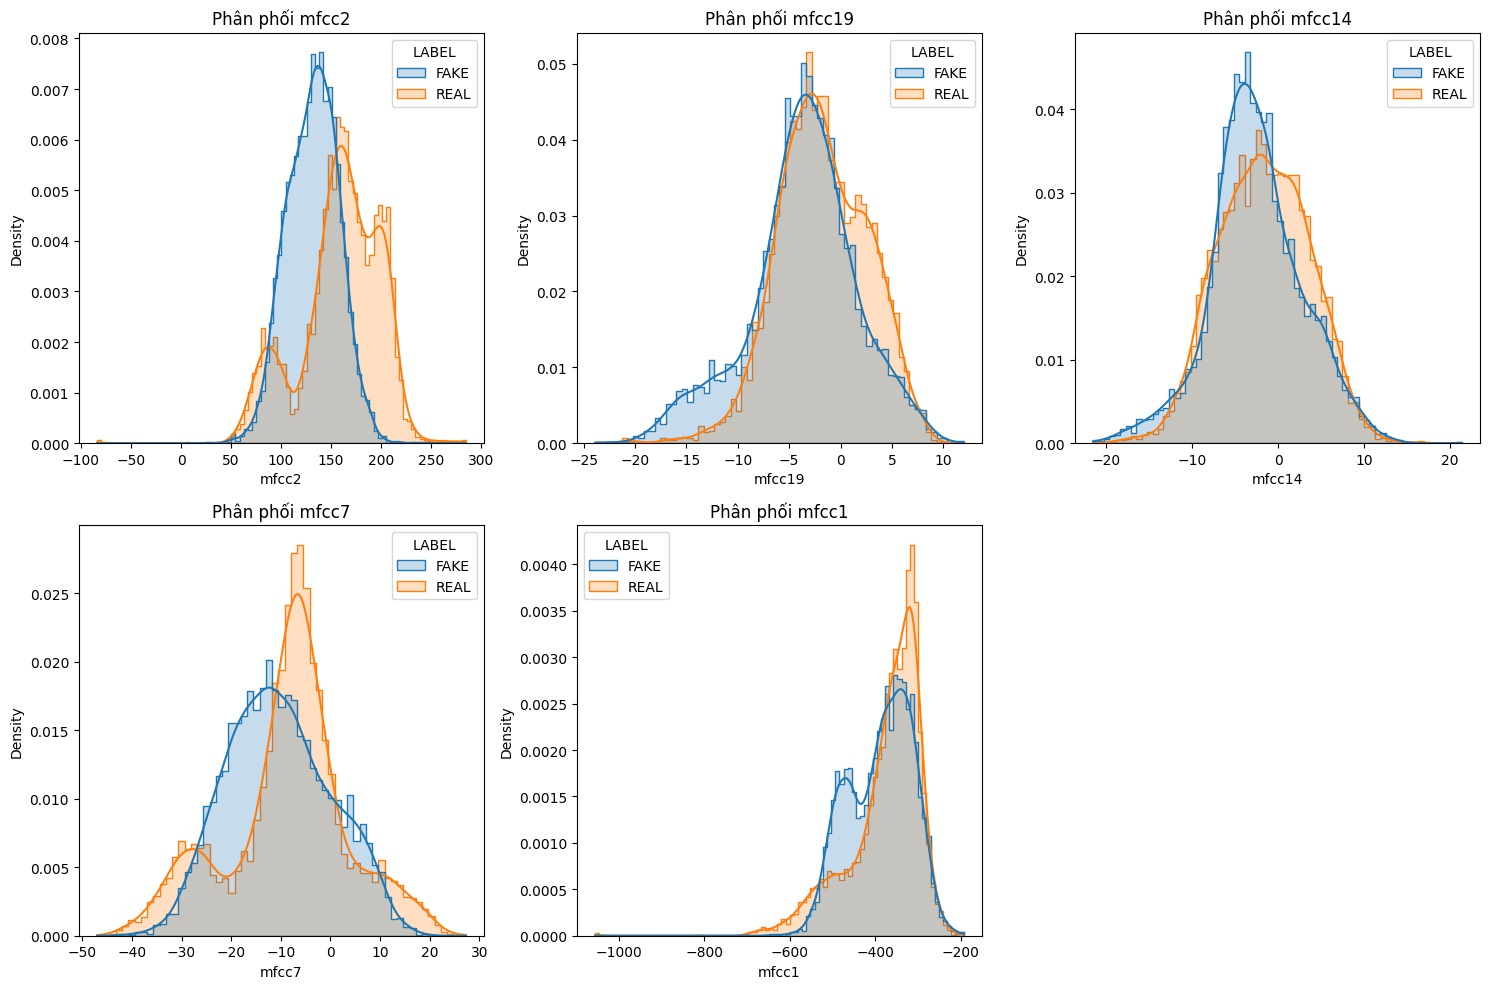

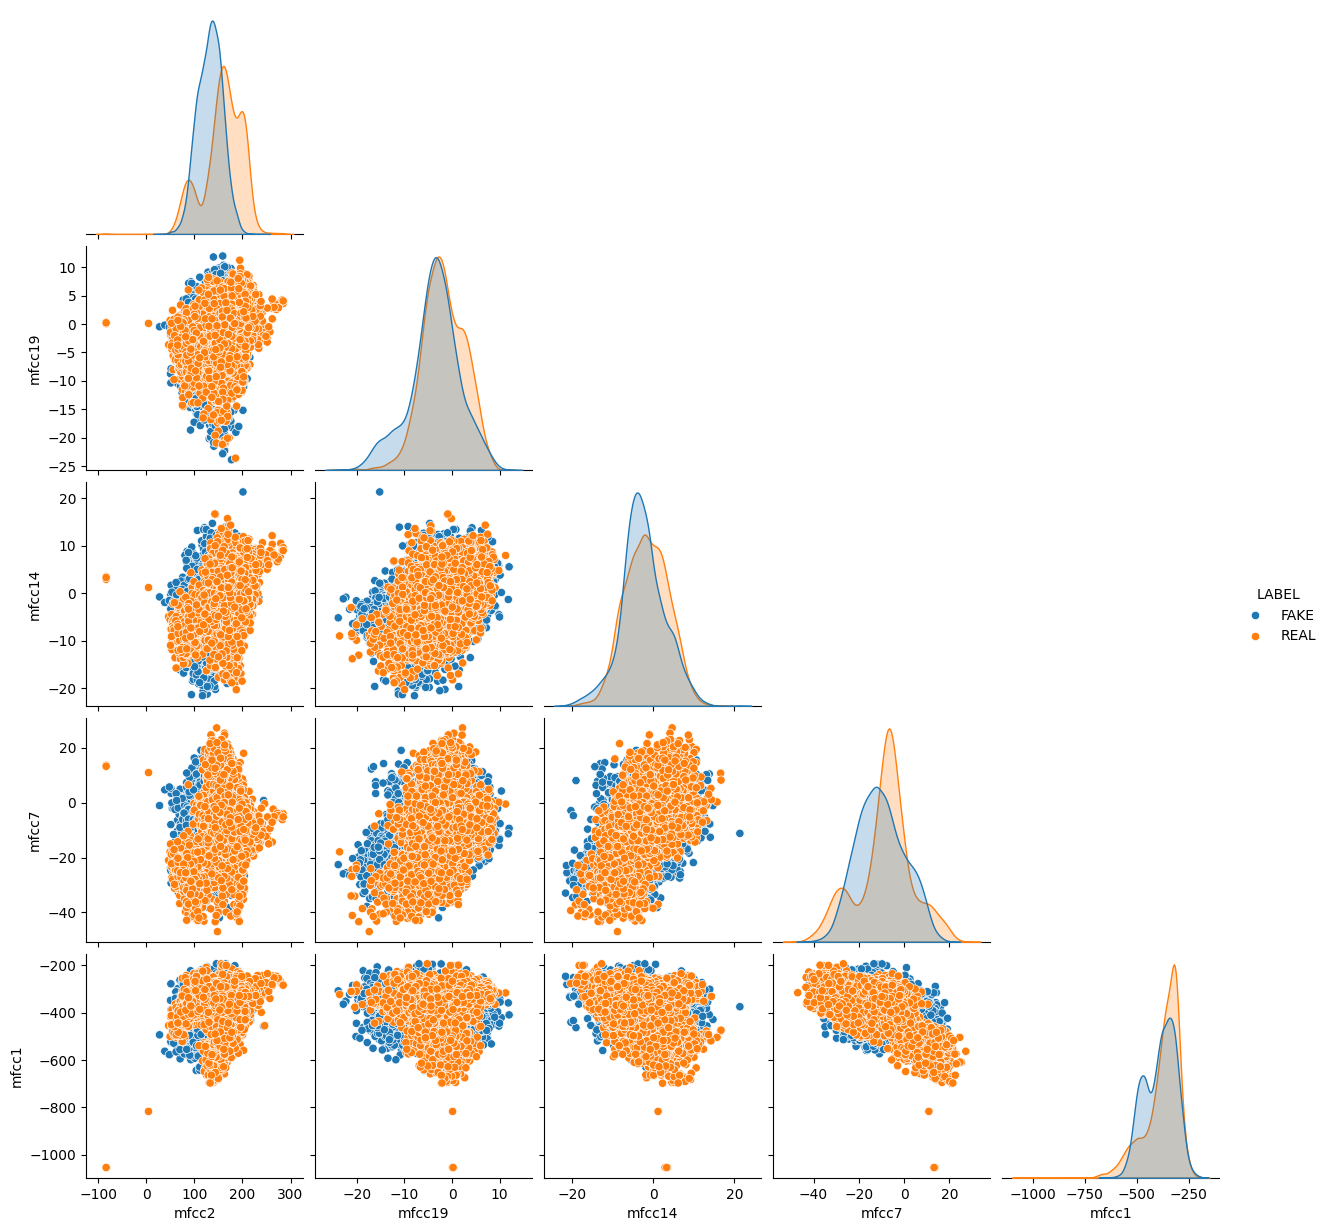

In [8]:
top_features = corr_with_label.index[1:6]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='LABEL', kde=True, element='step', stat='density')
    plt.title(f'Phân phối {feature}')
plt.tight_layout()
plt.show()

sns.pairplot(df[list(top_features) + ['LABEL']], hue='LABEL', diag_kind='kde', corner=True)
plt.show()